In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from lets_plot import *
LetsPlot.setup_html()    

In [2]:
cs = pd.read_csv("D:/Data Science for Marketing-I/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
cs

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
cs['engaged']=cs['Response'].apply(lambda x:1 if x=='Yes' else 0)
cs

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [5]:
cs['engaged'].value_counts()

engaged
0    7826
1    1308
Name: count, dtype: int64

In [6]:
cs['engaged'].sum()/cs['engaged'].count()*100

14.320122618786948

In [7]:
cs.groupby('Renew Offer Type')['engaged'].sum()/cs.groupby('Renew Offer Type')['engaged'].count()*100


Renew Offer Type
Offer1    15.831557
Offer2    23.376623
Offer3     2.094972
Offer4     0.000000
Name: engaged, dtype: float64

In [8]:
cs.groupby('Sales Channel')['engaged'].sum()/cs.groupby('Sales Channel')['engaged'].count()*100

Sales Channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: engaged, dtype: float64

In [9]:
pivot_table=cs.pivot_table(index='Renew Offer Type',values='Response',columns='engaged',aggfunc=len).fillna(0)
pivot_table.columns=['not engaged','engaged']
pivot_table

,not engaged,engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


<Axes: xlabel='Renew Offer Type'>

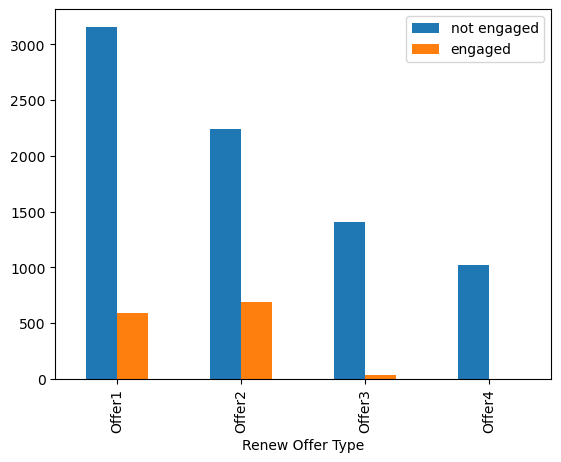

In [10]:
pivot_table.plot(kind='bar')

## total claim amount distribution

<Axes: title={'center': 'Total Claim Amount'}, xlabel='[engaged]'>

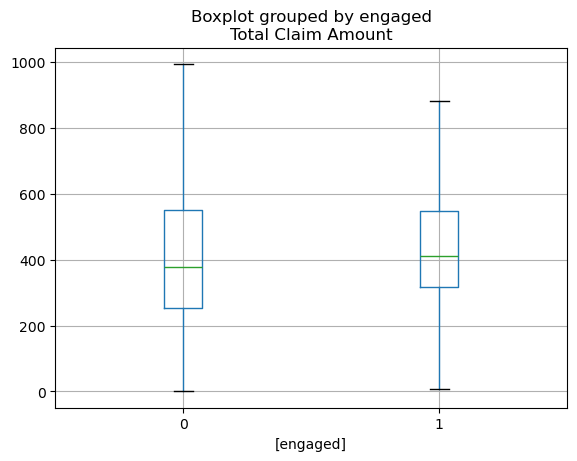

In [11]:
cs[['engaged','Total Claim Amount']].boxplot(by='engaged',showfliers=False)

<function matplotlib.pyplot.show(close=None, block=None)>

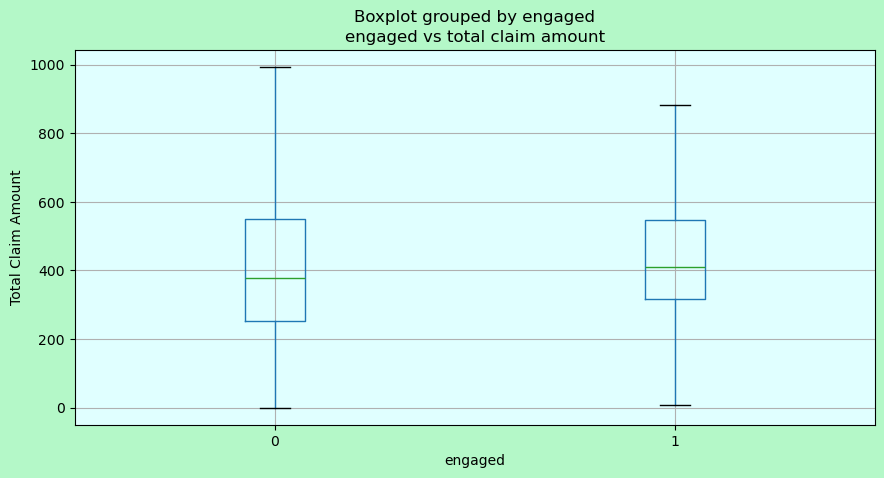

In [12]:
ax=cs[['engaged','Total Claim Amount']].boxplot(by='engaged',showfliers=False,figsize=(10,5))
ax.set_xlabel('engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('engaged vs total claim amount')

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")
plt.show

In [13]:
# pip install statsmodels.api

In [14]:
import statsmodels.api as sm

In [15]:
cs.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [16]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [17]:
continuous_vars=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
                   'Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints','Number of Policies' ,'Total Claim Amount']

In [18]:
logit=sm.Logit(cs['engaged'],cs[continuous_vars])
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [19]:
print(logit_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                -0.02546
Time:                        19:17:00   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006 

## different ways to handle catogorical variable

In [20]:
cs['Education'].value_counts()

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [21]:
# label encoding
labels,levels=cs['Education'].factorize()
cs['Education_factorized']=labels
labels[1:20]


array([0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0, 3, 1, 1, 3],
      dtype=int64)

## hot labelencoding

In [22]:
edu=pd.get_dummies(cs['Education'],dtype=int)
edu


,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
9129,1,0,0,0,0
9130,0,1,0,0,0
9131,1,0,0,0,0
9132,0,1,0,0,0


In [23]:
cs=cs.join(edu)

In [24]:
edu

,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
9129,1,0,0,0,0
9130,0,1,0,0,0
9131,1,0,0,0,0
9132,0,1,0,0,0


In [25]:
logit=sm.Logit(cs['engaged'],cs[edu.columns])
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.410141
         Iterations 6


In [26]:
print(logit_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9129
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                0.001441
Time:                        19:17:01   Log-Likelihood:                -3746.2
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                   0.02876
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bachelor                -1.8358      0.055    -33.146      0.000      -1.944      -1.727
College                 -1.7176      0.054    -31.945      0.000      -1.823      -1.612
Doctor      

In [27]:
gender_values,gender_labels=cs['Gender'].factorize()
cs['Gender_factorized']=gender_values

In [28]:
cs

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Vehicle Class,Vehicle Size,engaged,Education_factorized,Bachelor,College,Doctor,High School or Below,Master,Gender_factorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Two-Door Car,Medsize,0,0,1,0,0,0,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Four-Door Car,Medsize,0,0,1,0,0,0,0,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Two-Door Car,Medsize,0,0,1,0,0,0,0,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,SUV,Medsize,0,0,1,0,0,0,0,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Four-Door Car,Medsize,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,Four-Door Car,Medsize,0,0,1,0,0,0,0,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,Four-Door Car,Medsize,1,1,0,1,0,0,0,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,Four-Door Car,Medsize,0,0,1,0,0,0,0,1
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,Four-Door Car,Large,0,1,0,1,0,0,0,1


## regresion 

In [29]:
continue_vars=['Education_factorized','Gender_factorized']

In [30]:
logit=sm.Logit(cs['engaged'],cs[continue_vars])
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.489140
         Iterations 6


In [31]:
print(logit_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                 -0.1909
Time:                        19:17:01   Log-Likelihood:                -4467.8
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Education_factorized    -0.5536      0.018    -30.560      0.000      -0.589      -0.518
Gender_factorized       -1.1269      0.046    -24.263      0.000      -1.218      -1.036


In [32]:
print(logit_fit.params)

Education_factorized   -0.553618
Gender_factorized      -1.126860
dtype: float64


In [39]:
categories= pd.Categorical(cs['Education'],categories=['High School or Below','College','Bachelor','Master'])

## Adding Gender

In [35]:
gender_values, gender_lables = cs['Gender'].factorize()
cs['genderfactorized'] = gender_values

In [36]:
edu_values, edu_lables = cs['Education'].factorize()
edu_values

cs['educationfactorized'] = edu_values

In [41]:
cs['educationfactorized'] = categories.codes

In [42]:
cs

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,engaged,Education_factorized,Bachelor,College,Doctor,High School or Below,Master,Gender_factorized,genderfactorized,educationfactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,0,1,0,0,0,0,0,0,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,0,1,0,0,0,0,0,0,2
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,0,1,0,0,0,0,0,0,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,0,1,0,0,0,0,1,1,2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,0,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,0,1,0,0,0,0,1,1,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,1,0,1,0,0,0,0,0,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,0,0,1,0,0,0,0,1,1,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,1,0,1,0,0,0,1,1,1
